In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

In [2]:
or_census=pd.read_csv('oregon_redistricting/oregon_census.csv')

In [3]:
or_census.head()

,County_ID,County_Name,Population2020e,Population2010,Latitude,Longitude,Change2010_2020
0,0,Baker,16910,16134,44.7346,-117.6777,776
1,1,Benton,94665,85579,44.4929,-123.3844,9086
2,2,Clackamas,426515,375992,45.3088,-122.3999,50523
3,3,Clatsop,39455,37039,46.1068,-123.8773,2416
4,4,Columbia,53280,49351,45.9189,-122.9863,3929


In [4]:
census_df=pd.read_csv('census.csv')
census_df['COUNTYFP10']=census_df['COUNTYFP10'].astype(str).str.pad(3,fillchar='0')
census_df.head()

,county_id,county,population,COUNTYFP10,latitude,longitude
0,0,Adair,7496,001,41.328528,-94.478164
1,1,Adams,3704,003,41.021656,-94.696906
2,2,Allamakee,14061,005,43.274964,-91.382751
3,3,Appanoose,12317,007,40.744683,-92.870345
4,4,Audubon,5674,009,41.679178,-94.904312


## Boxplots and swarmplots for county populations

<AxesSubplot:xlabel='Population2020e'>

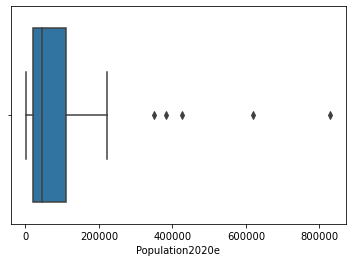

In [5]:
sns.boxplot(x=or_census['Population2020e'])

<AxesSubplot:xlabel='population'>

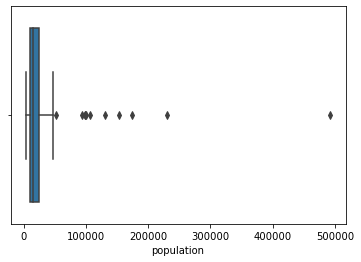

In [6]:
sns.boxplot(x=census_df['population'])

In [7]:
ia_array = census_df['population'].to_numpy()
or_array= or_census['Population2020e'].to_numpy()

In [8]:
census_df['population'].describe()

count        99.000000
mean      32225.949495
std       59658.599500
min        3704.000000
25%        9973.000000
50%       15211.000000
75%       25281.500000
max      492401.000000
Name: population, dtype: float64

In [9]:
census_df['population'].mean()/.2

161129.74747474748

In [10]:
pops=np.concatenate((ia_array, or_array),axis=0)

In [11]:
states=np.concatenate((np.array(['Iowa']*99), np.array(['Oregon']*36)),axis=0)


In [12]:
pop_df = pd.DataFrame({"state": states, "population": pops})

In [13]:
pop_df.head()

,state,population
0,Iowa,7496
1,Iowa,3704
2,Iowa,14061
3,Iowa,12317
4,Iowa,5674


<AxesSubplot:xlabel='population', ylabel='state'>

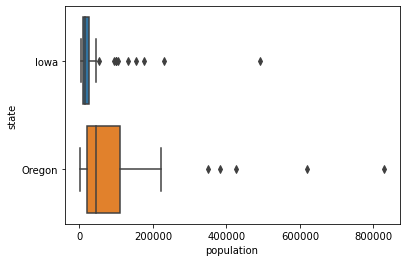

In [14]:
sns.boxplot(data=pop_df, x='population',y='state')

/opt/homebrew/Caskroom/miniforge/base/envs/myenv/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 47.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='state', ylabel='population'>

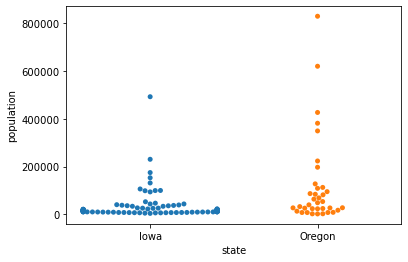

In [15]:
sns.swarmplot(data=pop_df, y='population',x='state')

<AxesSubplot:xlabel='population', ylabel='Count'>

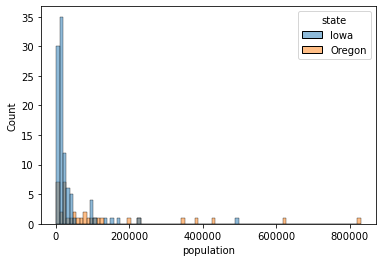

In [16]:
sns.histplot(data=pop_df, x='population', hue='state',bins=90)